In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart_disease_risk_dataset_earlymed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Chest_Pain           70000 non-null  int64
 1   Shortness_of_Breath  70000 non-null  int64
 2   Fatigue              70000 non-null  int64
 3   Palpitations         70000 non-null  int64
 4   Dizziness            70000 non-null  int64
 5   Swelling             70000 non-null  int64
 6   Pain_Arms_Jaw_Back   70000 non-null  int64
 7   Cold_Sweats_Nausea   70000 non-null  int64
 8   High_BP              70000 non-null  int64
 9   High_Cholesterol     70000 non-null  int64
 10  Diabetes             70000 non-null  int64
 11  Smoking              70000 non-null  int64
 12  Obesity              70000 non-null  int64
 13  Sedentary_Lifestyle  70000 non-null  int64
 14  Family_History       70000 non-null  int64
 15  Chronic_Stress       70000 non-null  int64
 16  Gender               7

In [3]:
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,48,0
1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,46,0
2,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,66,0
3,1,1,0,1,0,0,1,1,1,0,1,1,0,1,1,1,1,60,1
4,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,69,0


In [4]:
df.isnull().sum()

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64

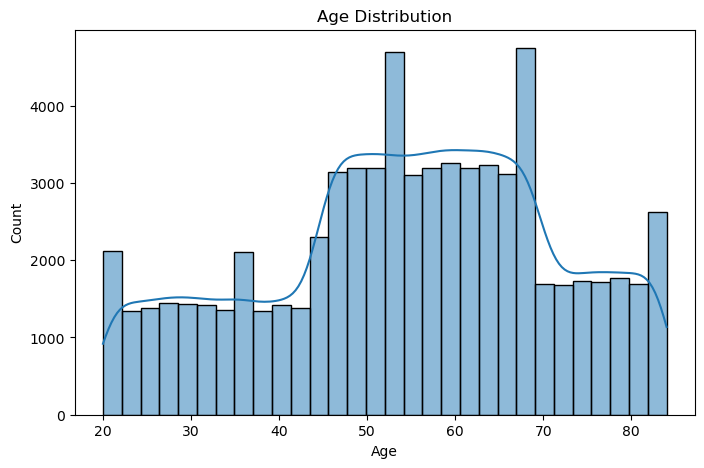

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# رسم التوزيع العمري
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_26524\3400111202.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart_Risk', data=df, palette='viridis')


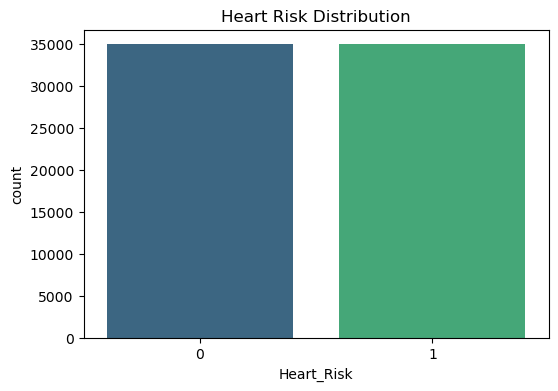

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# رسم توزيع متغير Heart_Risk
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart_Risk', data=df, palette='viridis')
plt.title("Heart Risk Distribution")
plt.show()

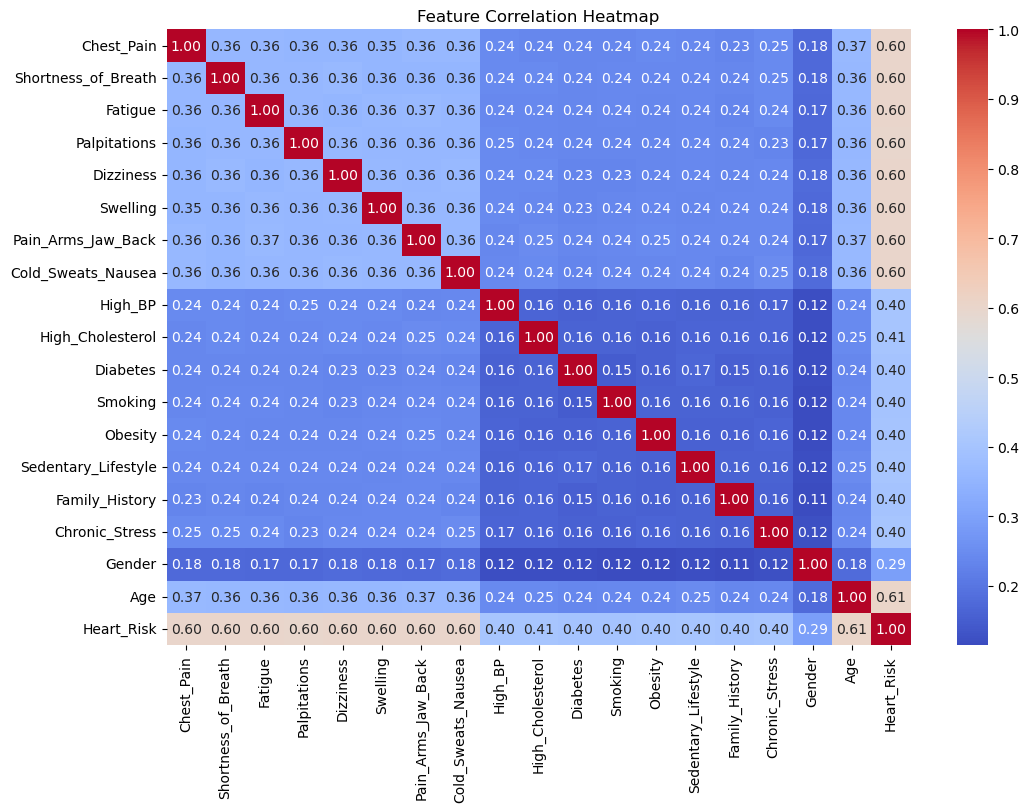

In [7]:
# رسم مصفوفة الارتباط
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

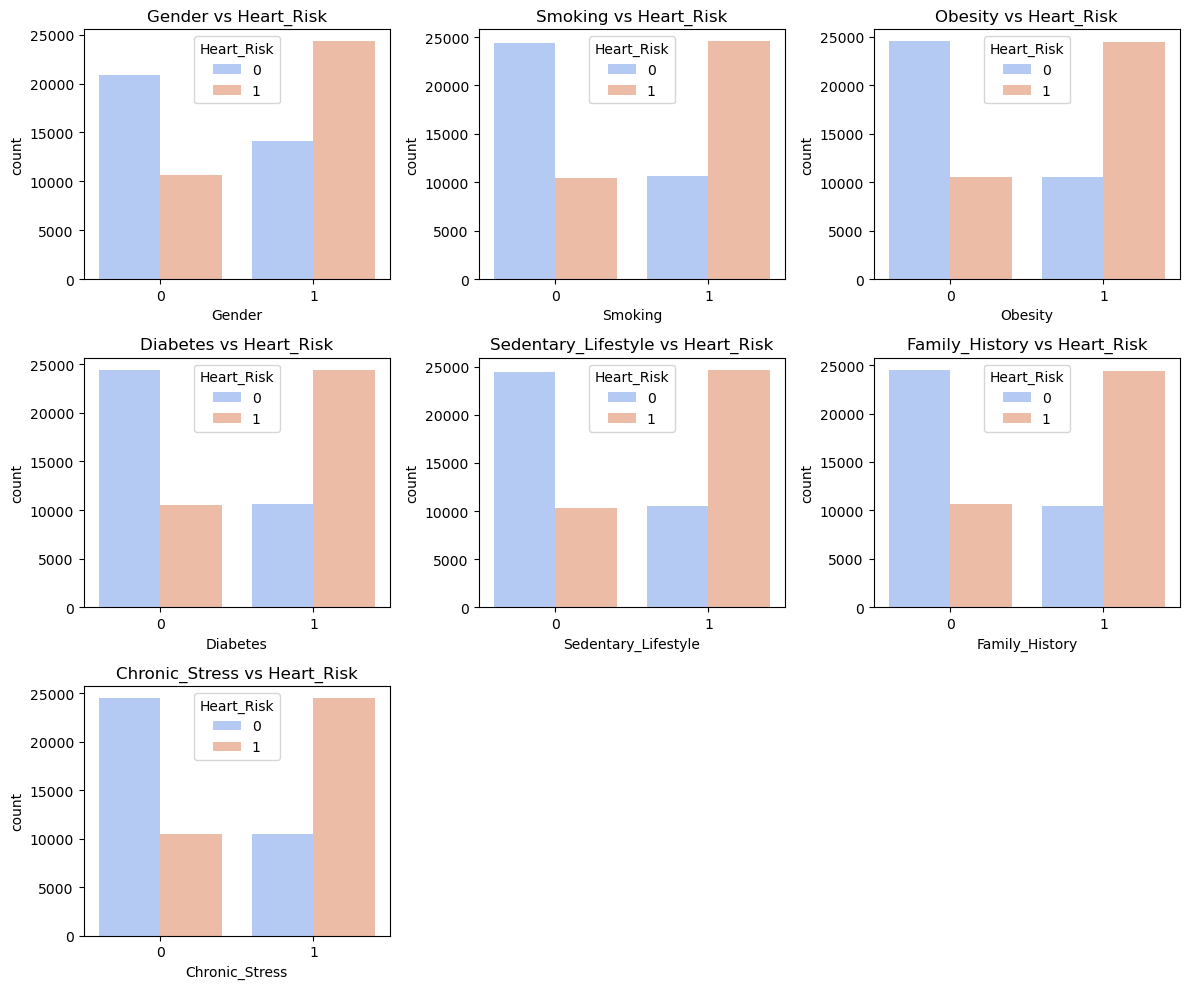

In [8]:
# تحليل العلاقة بين المتغيرات و Heart_Risk
categorical_features = ['Gender', 'Smoking', 'Obesity', 'Diabetes', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='Heart_Risk', data=df, palette='coolwarm')
    plt.title(f"{feature} vs Heart_Risk")
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_26524\3582135627.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Risk', y=feature, data=df, palette='coolwarm')
C:\Users\user\AppData\Local\Temp\ipykernel_26524\3582135627.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Risk', y=feature, data=df, palette='coolwarm')
C:\Users\user\AppData\Local\Temp\ipykernel_26524\3582135627.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Risk', y=feature, data=df, palette='coolwarm')


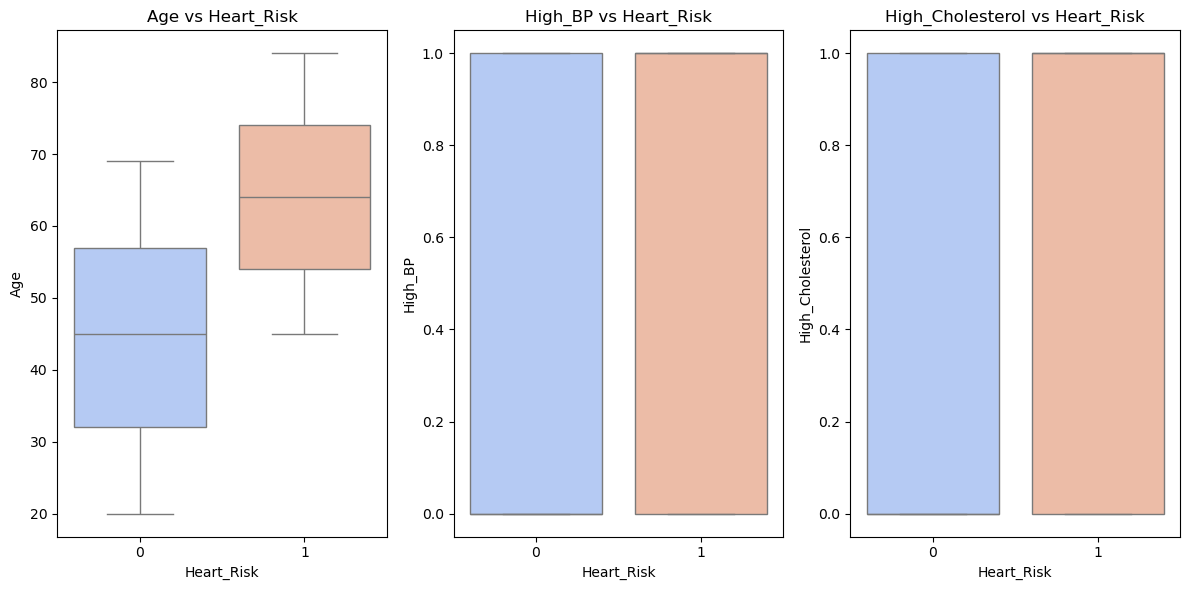

In [9]:
# توزيع القيم الرقمية بالنسبة لـ Heart_Risk
numerical_features = ['Age', 'High_BP', 'High_Cholesterol']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Heart_Risk', y=feature, data=df, palette='coolwarm')
    plt.title(f"{feature} vs Heart_Risk")
plt.tight_layout()
plt.show()

In [10]:
# تحليل ارتباط كل ميزة بمتغير Heart_Risk
correlations = df.corr()['Heart_Risk'].sort_values(ascending=False)
print("\nFeature Correlation with Heart_Risk:")
print(correlations)


Feature Correlation with Heart_Risk:
Heart_Risk             1.000000
Age                    0.605182
Pain_Arms_Jaw_Back     0.601403
Cold_Sweats_Nausea     0.601093
Dizziness              0.600202
Chest_Pain             0.599944
Fatigue                0.599260
Swelling               0.599173
Shortness_of_Breath    0.598772
Palpitations           0.596773
High_Cholesterol       0.405001
Sedentary_Lifestyle    0.404696
High_BP                0.404462
Chronic_Stress         0.401914
Obesity                0.399229
Smoking                0.398007
Family_History         0.397604
Diabetes               0.396086
Gender                 0.293609
Name: Heart_Risk, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# تجهيز البيانات للنمذجة
X = df.drop(columns=['Heart_Risk'])
y = df['Heart_Risk']

In [14]:
# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# تطبيع البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# تدريب نموذج Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# استخراج أهمية الميزات
feature_importances = rf_model.feature_importances_
feature_names = X.columns

print(feature_names)

Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age'],
      dtype='object')


In [18]:
# ترتيب الميزات حسب الأهمية
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_26524\3741078554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='coolwarm')


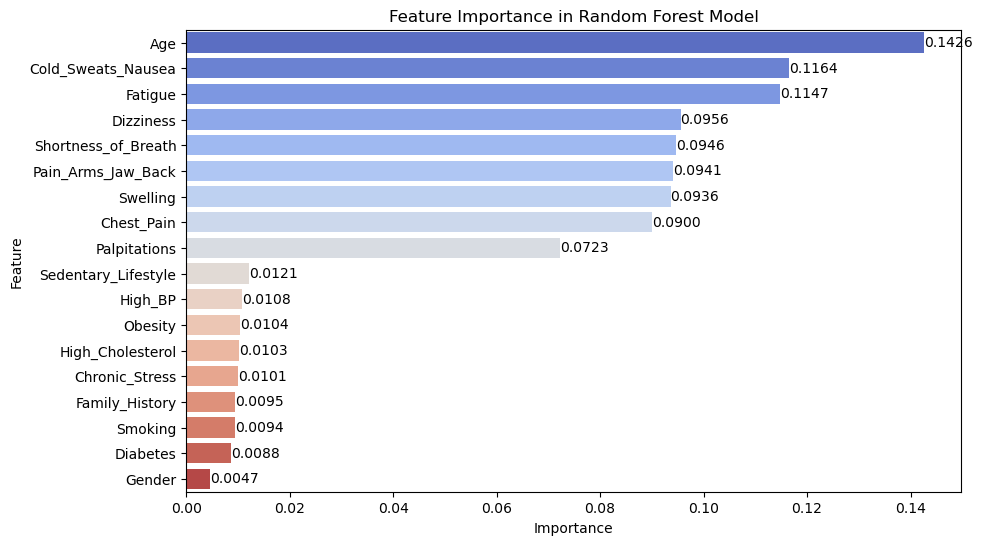

In [19]:
# رسم أهمية الميزات مع عرض القيم على الأعمدة
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='coolwarm')
plt.title("Feature Importance in Random Forest Model")
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f')
plt.show()

In [20]:
from sklearn.svm import SVC

In [21]:
# تجربة نماذج إضافية
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": rf_model,
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Model Performance:
Accuracy: 0.9917857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6998
           1       0.99      0.99      0.99      7002

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

Confusion Matrix:
 [[6937   61]
 [  54 6948]]

Random Forest Model Performance:
Accuracy: 0.992
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6998
           1       0.99      0.99      0.99      7002

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

Confusion Matrix:
 [[6945   53]
 [  59 6943]]

Neural Network Model Performance:
Accuracy: 0.9892142857142857
Classification Report:


       Actual  Predicted  Correct
51867       1          0    False
50507       0          1    False
22170       1          0    False
26577       1          0    False
16131       0          1    False


C:\Users\user\AppData\Local\Temp\ipykernel_26524\2430910938.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Actual', data=errors_incorrect, palette='coolwarm')


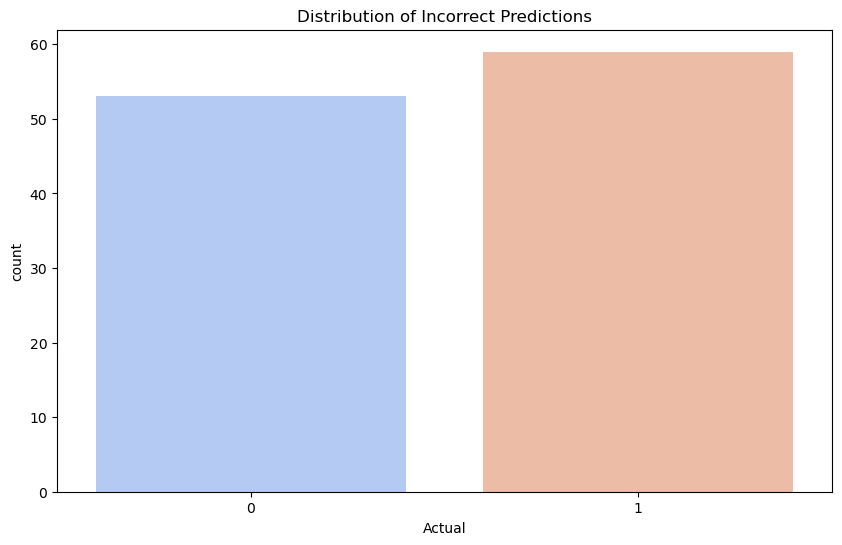

In [22]:
# تحليل أخطاء النموذج
# حساب القيم المتنبأ بها
y_pred = rf_model.predict(X_test)

# مقارنة القيم المتنبأ بها بالقيم الفعلية
errors = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Correct': y_test == y_pred
})

# عرض الحالات التي أخطأ فيها النموذج
errors_incorrect = errors[errors['Correct'] == False]
print(errors_incorrect.head())  # عرض أول 5 أخطاء

# رسم بياني لعرض الأخطاء
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', data=errors_incorrect, palette='coolwarm')
plt.title("Distribution of Incorrect Predictions")
plt.show()

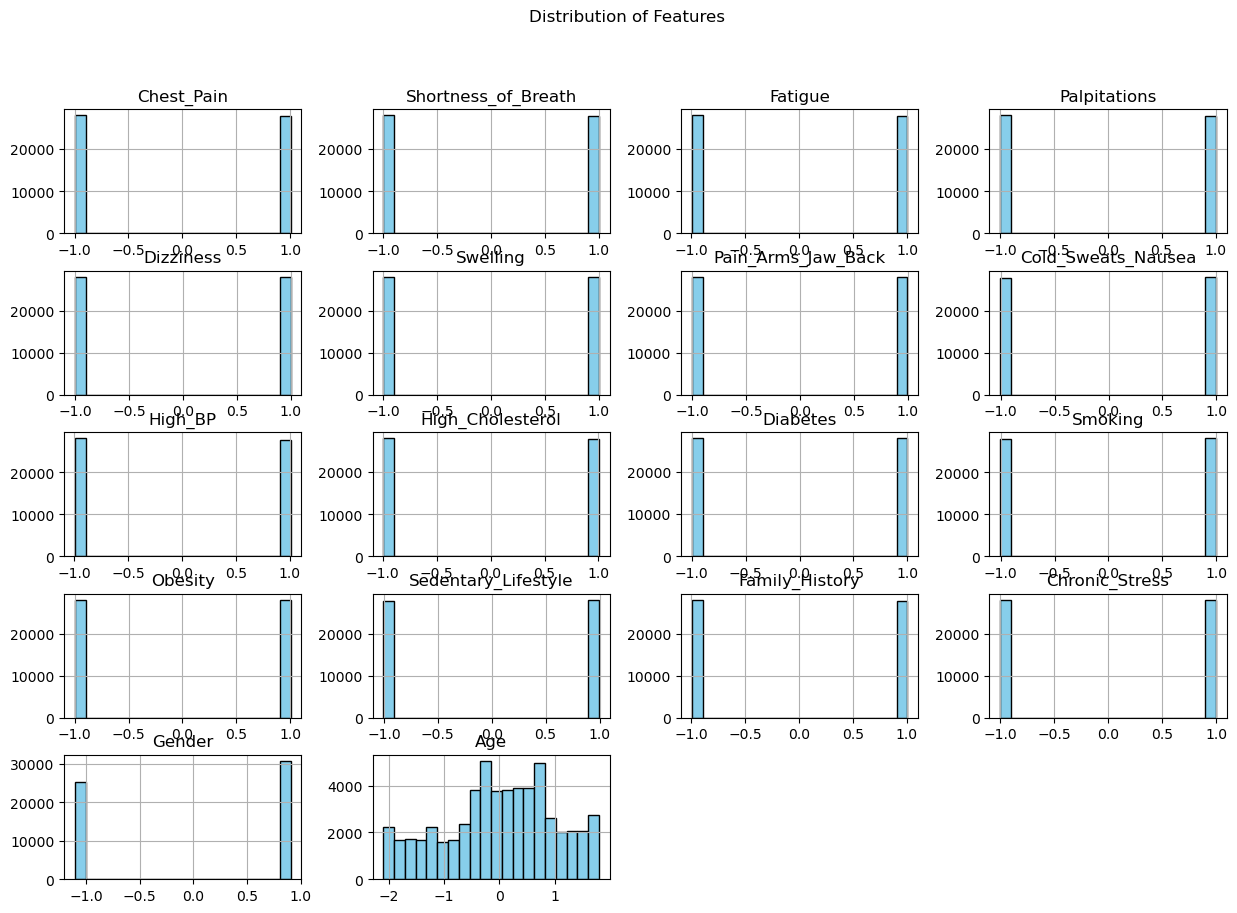

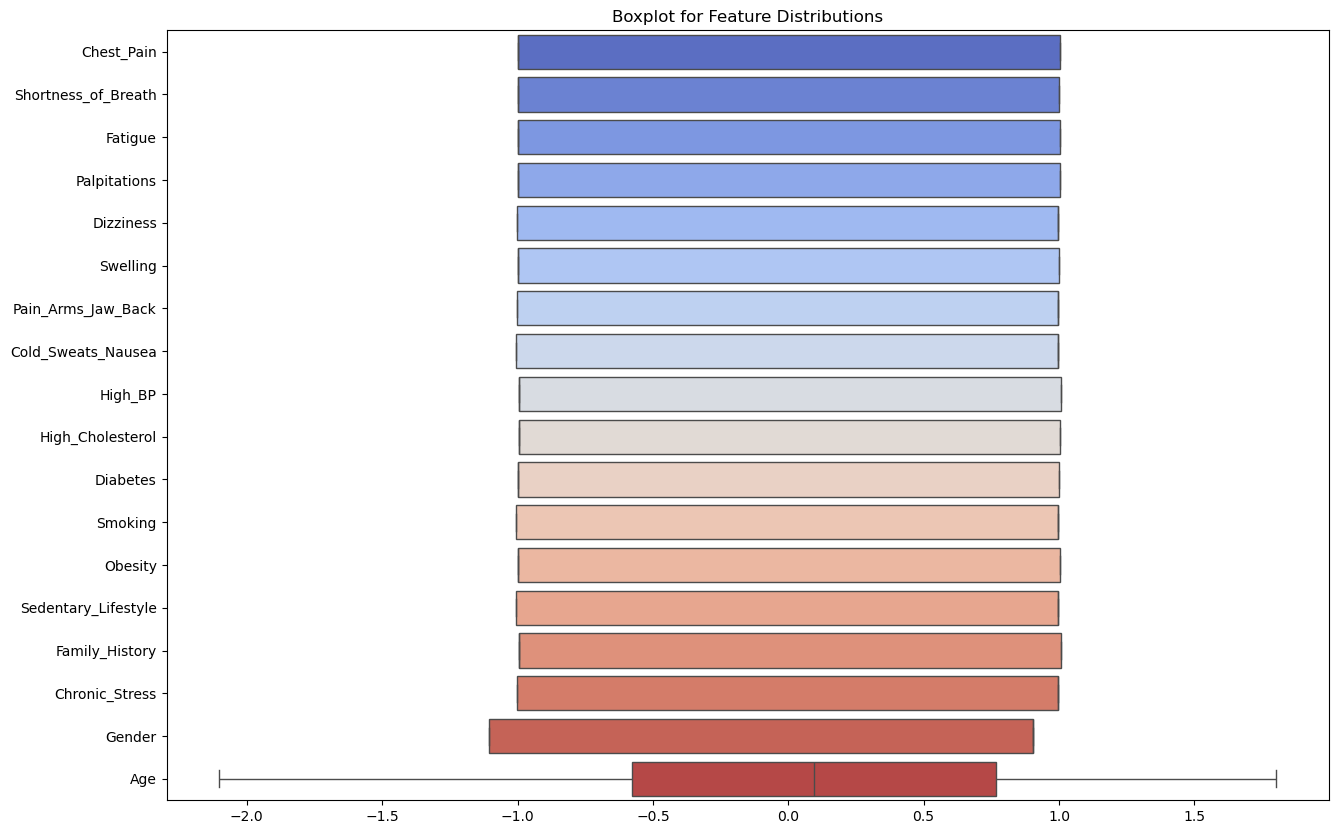

In [23]:
# التحقق من التوزيع الإحصائي للبيانات
# رسم هيستوجرام لكل ميزة
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Features')
plt.show()

# رسم Boxplot لكل ميزة للتحقق من وجود القيم الشاذة
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train_df, orient="h", palette="coolwarm")
plt.title('Boxplot for Feature Distributions')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_26524\2484484596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="Set2")


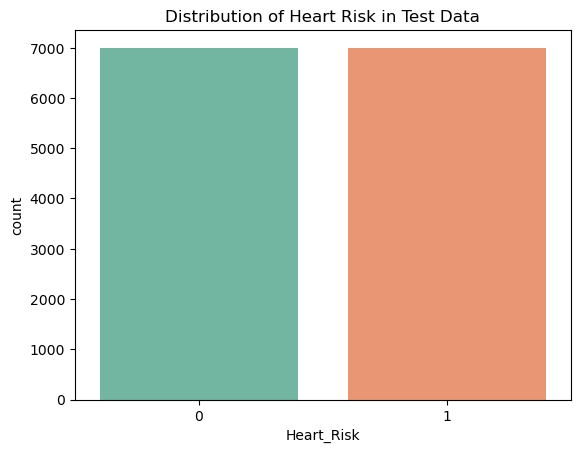

In [24]:
# التحقق من التوازن بين الفئات
# تحقق من التوزيع بين الفئات (قلب صحي مقابل قلب غير صحي)
sns.countplot(x=y_test, palette="Set2")
plt.title('Distribution of Heart Risk in Test Data')
plt.show()

In [25]:
# حفظ النموذج
import pickle

with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)